In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Load mnist data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
xa = train_images.reshape((60000, 28 * 28)).astype('float32') / 255  # normalizatioin
ya = train_labels

11493376/11490434 [==============================] - 0s 0us/step


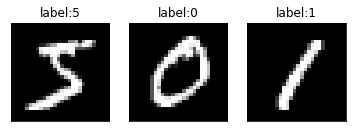

In [0]:
img_id = [0,1,3]
plt.figure(figsize=(6, 2))
for i in range(len(img_id)):
    # display original
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(train_images[img_id[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("label:" + str(ya[img_id[i]]) )
plt.show()

## Pre-process data

In [0]:
#the first 40000 data of xa, ya are re shffule, with the last original 20000 data are saved to xb, yb
#by this way, there will be at least 20000 data set with the same category
idx = np.arange(40000)                      
np.random.shuffle(idx)                      
xb = np.concatenate((xa[idx], xa[40000:]))  
yb = np.concatenate((ya[idx], ya[40000:]))  
# build label：1 is the same category, 0 is not
y = np.where(ya==yb, 1.0, 0.0)   
# re shuffle xa/ya, xb/yb
idx = np.arange(60000)               
np.random.shuffle(idx)               
xa, xb, y = xa[idx], xb[idx], y[idx] 

print(f'Total data: {len(y)}, {int(y.sum())} data are in the same category')

訓練資料共 60000 筆, 其中有 24046 筆為相同數字


## Make multi-input model

In [0]:
a = Input(shape=(784,))
b = Input(shape=(784,))

shr = Dense(512, activation='relu')    # shared layer for image analysis
out = concatenate([shr(a), shr(b)])     # combine input a and b

out = Dense(10, activation='relu')(out)    # Dense layer for classification
out = Dense(1, activation='sigmoid')(out)  # binary classification

model = Model([a, b], out)               # build the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 1024)         0           dense[0][0]                  

## Train the model

In [0]:
#10% for validation
history = model.fit([xa, xb], y, validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
422/422 - 2s - loss: 0.2692 - acc: 0.8915 - val_loss: 0.1515 - val_acc: 0.9407
Epoch 2/20
422/422 - 1s - loss: 0.1336 - acc: 0.9522 - val_loss: 0.1189 - val_acc: 0.9578
Epoch 3/20
422/422 - 1s - loss: 0.0976 - acc: 0.9665 - val_loss: 0.0982 - val_acc: 0.9630
Epoch 4/20
422/422 - 1s - loss: 0.0736 - acc: 0.9750 - val_loss: 0.0814 - val_acc: 0.9705
Epoch 5/20
422/422 - 1s - loss: 0.0577 - acc: 0.9805 - val_loss: 0.0804 - val_acc: 0.9720
Epoch 6/20
422/422 - 1s - loss: 0.0447 - acc: 0.9859 - val_loss: 0.0788 - val_acc: 0.9695
Epoch 7/20
422/422 - 1s - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0808 - val_acc: 0.9727
Epoch 8/20
422/422 - 1s - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0819 - val_acc: 0.9713
Epoch 9/20
422/422 - 1s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0850 - val_acc: 0.9755
Epoch 10/20
422/422 - 1s - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0918 - val_acc: 0.9752
Epoch 11/20
422/422 - 1s - loss: 0.0115 - acc: 0.9967 - val_loss: 0.0905 - val_acc: 0.9740
Epoch 12

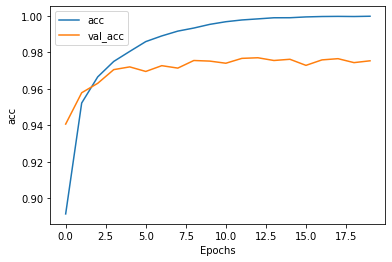

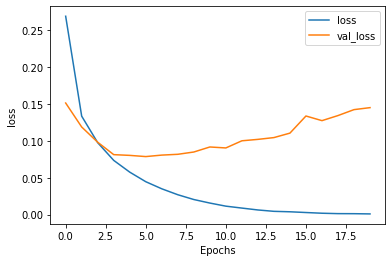

In [0]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

## Test the model

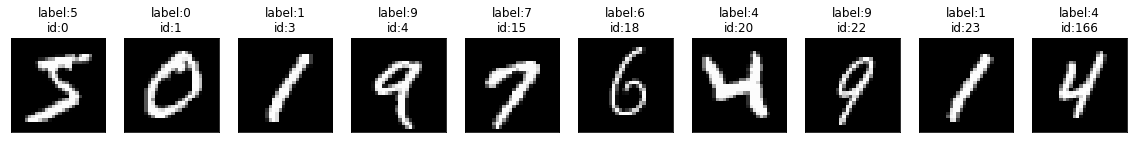

In [0]:
img_id = [0,1,3,4,15,18,20,22,23,166]
plt.figure(figsize=(20, 2))
for i in range(len(img_id)):
    # display original
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[img_id[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("label:" + str(ya[img_id[i]]) + "\n" + "id:" + str(img_id[i]))
plt.show()

In [0]:
x1 = train_images[20].reshape((1, 28 * 28)).astype('float32') / 255
x2 = train_images[166].reshape((1, 28 * 28)).astype('float32') / 255
print(x1.shape)
# x1 = np.expand_dims(xa[3], axis=0)
# x2 = np.expand_dims(xa[23], axis=0)

(1, 784)


In [0]:
model.predict([x1,x2])

array([[0.99998534]], dtype=float32)